In [1]:
import pandas as pd
import numpy as np
from forret_noir import filter as ft
from forret_noir import forestpy as fp
from forret_noir import forest as fo

In [2]:
categorical = pd.read_csv("files_for_lab/categorical.csv")
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [3]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         95412 non-null  object
 1   CLUSTER       95412 non-null  int64 
 2   HOMEOWNR      95412 non-null  object
 3   GENDER        95412 non-null  object
 4   DATASRCE      95412 non-null  int64 
 5   RFA_2R        95412 non-null  object
 6   RFA_2A        95412 non-null  object
 7   GEOCODE2      95412 non-null  object
 8   DOMAIN_A      95412 non-null  object
 9   DOMAIN_B      95412 non-null  int64 
 10  ODATEW_YR     95412 non-null  int64 
 11  ODATEW_MM     95412 non-null  int64 
 12  DOB_YR        95412 non-null  int64 
 13  DOB_MM        95412 non-null  int64 
 14  MINRDATE_YR   95412 non-null  int64 
 15  MINRDATE_MM   95412 non-null  int64 
 16  MAXRDATE_YR   95412 non-null  int64 
 17  MAXRDATE_MM   95412 non-null  int64 
 18  LASTDATE_YR   95412 non-null  int64 
 19  LAST

In [4]:
numerical = pd.read_csv("files_for_lab/numerical.csv")
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [5]:
target = pd.read_csv("files_for_lab/target.csv")
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [6]:
target["TARGET_B"].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [7]:
numerical_filtered = ft.reduce_features_variance(numerical, 0.02)

In [8]:
numerical_filtered

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,...,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.608247,0.666667,1.000000,0.343434,0.181818,0.555556,0.000000,0.353535,0.656566,0.929293,...,0.333333,0.656566,0.404040,0.285714,0.4,0.433333,0.498045,0.0,1.000000,0.622951
1,0.463918,0.833333,1.000000,0.555556,0.111111,1.000000,1.000000,0.000000,0.000000,0.676768,...,1.000000,0.000000,1.000000,0.952381,0.8,0.183333,0.774510,0.0,0.333333,0.000000
2,0.624862,0.333333,0.111111,0.292929,0.333333,0.111111,0.000000,0.020202,0.989899,0.969697,...,0.222222,0.777778,0.171717,0.428571,0.4,0.416667,0.078617,1.0,1.000000,0.967213
3,0.711340,0.000000,0.444444,0.141414,0.313131,0.000000,0.000000,0.080808,0.929293,0.616162,...,0.232323,0.777778,0.222222,0.761905,0.4,0.433333,0.899764,1.0,1.000000,0.655738
4,0.793814,0.333333,0.222222,0.090909,0.535354,1.000000,1.000000,0.000000,0.000000,0.020202,...,1.000000,0.010101,0.212121,0.285714,0.4,0.700000,0.037079,1.0,0.333333,0.409836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.624862,0.666667,1.000000,0.474747,0.111111,1.000000,1.000000,0.000000,0.000000,0.787879,...,0.939394,0.070707,0.989899,0.761905,0.8,0.083333,0.962399,0.0,0.000000,0.180328
95408,0.484536,1.000000,1.000000,0.434343,0.191919,1.000000,0.969697,0.000000,0.040404,0.919192,...,0.696970,0.313131,0.676768,0.857143,1.0,0.050000,0.639828,1.0,0.000000,0.016393
95409,0.608247,0.666667,1.000000,0.464646,0.202020,1.000000,1.000000,0.000000,0.000000,0.828283,...,1.000000,0.000000,1.000000,0.238095,0.4,0.216667,0.988852,1.0,0.666667,0.540984
95410,0.587629,1.000000,1.000000,0.353535,0.202020,0.777778,1.000000,0.000000,0.000000,0.929293,...,1.000000,0.000000,1.000000,0.571429,0.6,0.583333,0.024466,1.0,1.000000,0.163934


In [9]:
# numerical_filtered.info()

In [10]:
for col in categorical.columns:
    categorical[col] = categorical[col].astype(object)

In [11]:
# categorical.info()

In [12]:
X = pd.concat([numerical_filtered, categorical], axis = 1)

In [13]:
y = target[["TARGET_B"]]

In [14]:
X_train, X_test, y_train, y_test, one_hot_file = fp.one_hot(X, "forst_one_hot", y=y, )

In [15]:
X_train_SMOTE, y_train_SMOTE = fp.smote(X_train, y_train)

In [16]:
y_train_SMOTE["TARGET_B"].value_counts()

1    72486
0    72486
Name: TARGET_B, dtype: int64

In [18]:
random_forest = {'max_depth': max_depth_choices,    
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf,
                'max_samples': max_samples,
                'random_state': random_state
               }

In [17]:
max_depth_choices=[3,4,5,6,7,8,9,10,None]
min_sample_split=[10, 20, 30]
min_sample_leaf=[10, 20, 30]
max_samples=[0.4, 0.8, 1.2]
random_state=[24, 42, 56]

In [19]:
best_forest_params = fo.random_search(X_train_SMOTE, y_train_SMOTE, random_forest, model = "forest_class")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 117, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samp

{'random_state': 56, 'min_samples_split': 10, 'min_samples_leaf': 30, 'max_samples': 0.8, 'max_depth': None}
The best accuracy for the best hyperparameters is 0.97


In [34]:
best_forest_params

In [17]:
forest_grid = {'max_depth': None,    
                'min_samples_split': 10,
                'min_samples_leaf': 30,
                'max_samples': 0.8,
                'random_state': 56
               }

C:\Users\micle\Ironhack_DAFTFEB2022\GitHub\lab-random-forests\forret_noir\forest.py:184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


The accuracy for the Random Forest in the TRAIN set is 0.97
The accuracy for the Random Forest in the TEST  set is 0.94
-----------------------------
-----Logistic Regression-----
----------Train Set----------
-----------------------------
The accuracy in the TRAIN set is: 0.97
The precision in the TRAIN set is: 1.00
The recall in the TRAIN set is: 0.95
The F1 in the TRAIN set is: 0.97
The Cohen-Kappa-Score in the TRAIN set is: 0.95
-----------------------------
-----Logistic Regression-----
-----------Test Set----------
-----------------------------
The accuracy in the TEST set is: 0.94
The precision in the TEST set is: 0.06
The recall in the TEST set is: 0.01
The F1 in the TEST set is: 0.01
The Cohen-Kappa-Score in the TEST set is: 0.00
-----------------------------
Filename: target_forest.sav


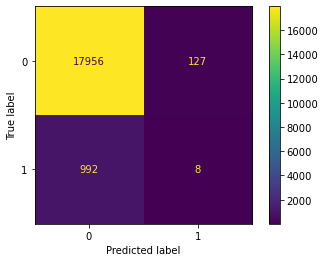

In [18]:
file_forest = fo.random_forest_class(X_test, y_test, forest_grid, "target", [0, 1], X_train = X_train_SMOTE, y_train = y_train_SMOTE)

In [19]:
X_test

,STATE_CA,STATE_NC,STATE_FL,STATE_other,STATE_IN,STATE_MI,STATE_MO,STATE_TX,STATE_WA,STATE_WI,...,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.989899,0.020202,0.959596,0.619048,0.6,0.350000,0.776898,1.0,0.000000,0.163934
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,1.000000,0.238095,0.4,0.483333,0.355786,0.0,0.000000,0.475410
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.989899,0.523810,0.4,0.366667,0.829647,1.0,0.000000,0.065574
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.000000,0.000000,1.000000,0.428571,0.6,0.466667,0.160853,0.0,0.333333,0.065574
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.969697,0.010101,0.959596,0.000000,0.2,0.083333,0.836081,1.0,0.000000,0.639344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.808081,0.202020,0.838384,0.285714,0.4,0.216667,0.323640,1.0,0.666667,0.967213
19079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.414141,0.595960,0.828283,0.333333,0.4,0.333333,0.412560,0.0,0.333333,0.163934
19080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.161616,0.727273,0.000000,0.285714,0.4,0.083333,0.254852,0.0,0.000000,0.967213
19081,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.979798,0.380952,0.4,0.516667,0.250811,1.0,0.000000,0.885246


In [20]:
numerical["AVGGIFT"].mean()

13.347785980847897

In [24]:
numerical["AVGGIFT"].sum()

1273538.956004663

In [23]:
target["TARGET_D"].mean()

0.7930731983398315

In [25]:
target["TARGET_D"].sum()

75668.7

The model is quite overfitted and the False Positive Predictions are quite high, which means that people are estimated to donate who in fact do not. From the amount spent for gifts and the donated value it is quite ovious that it makes no sense to proceed with this campain like this.